# Decision tree
### Initial model

In [1]:
# Import
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display
from sklearn.model_selection import train_test_split

In [ ]:
# Data preparation: Strokes project

# Import libraries
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display
from sklearn.model_selection import train_test_split

# Load data into pandas dataframe
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Create dummies objects
gender = pd.get_dummies(data['gender'])
ever_married = pd.get_dummies(data['ever_married'])
work_type = pd.get_dummies(data['work_type'])
residence_type = pd.get_dummies(data['Residence_type'])
smoking_status = pd.get_dummies(data['smoking_status'])

# Drop old and not usefull columns
data = data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'id'], axis=1)

# Create new dataframe
data = pd.concat([data, gender, ever_married, work_type, residence_type, smoking_status], axis=1)

# Rename column names
data = data.rename(columns={'Yes':'ever_married', 'No':'never_married', 'Unknown':'unknown_smoking_status', 'Other':'other_gender'})

# Clean column names
data.columns = data.columns.str.lower().str.replace(' ','_')

# Remove rows with N\A values
data.dropna(axis=0, inplace=True)


# Split the data into target "y" and input "X"
y = data['stroke']
X = data.drop('stroke', axis=1)

#Split the data into 70% training and 30% testing
train_data, test_data, train_labels, test_labels = train_test_split(X, y, train_size=0.7, random_state=1265599650)

# print shapes
print(f'shapes:\nTrain data: {train_data.shape}\nTest data: {test_data.shape}\nTrain labels: {train_labels.shape}\nTest labels: {test_labels.shape}')

print(train_data.info())


In [2]:
# Load and preprocess data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Create dummies objects
gender = pd.get_dummies(data['gender'])
ever_married = pd.get_dummies(data['ever_married'])
work_type = pd.get_dummies(data['work_type'])
residence_type = pd.get_dummies(data['Residence_type'])
smoking_status = pd.get_dummies(data['smoking_status'])

# Drop old columns
data = data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

# Create new dataframe
data = pd.concat([data, gender, ever_married, work_type, residence_type, smoking_status], axis=1)

# Remove rows with N\A values
data.dropna(axis=0, inplace=True)

# Split the data into target "y" and input "X"
y = data['stroke']
X = data.drop('stroke', axis=1)

#Split the data into 70% training and 30% testing
train_data, test_data, train_labels, test_labels = train_test_split(X, y, train_size=0.8, random_state=1265599650)



print(f'shapes:\nTrain data: {train_data.shape}\nTest data: {test_data.shape}\nTrain labels: {train_labels.shape}\nTest labels: {test_labels.shape}')

# Visualizeren


shapes:
Train data: (3436, 22)
Test data: (1473, 22)
Train labels: (3436,)
Test labels: (1473,)


In [3]:
# train and fit basic model
model = DecisionTreeClassifier()
model.fit(train_data, train_labels)
prediction = model.predict(train_data)

train_accuracy = metrics.accuracy_score(train_labels, prediction)
print(f'training accuracy data: {train_accuracy}')

training accuracy data: 1.0


### Parameter optimization options
1. Early stopping &rarr; where to stop
2. Pruning &rarr; cutting leafs
3. Significance thresholding &rarr; stop splitting when information gain is insignificant 

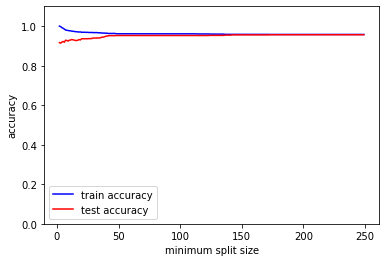

best minimal split size: 173


In [4]:
# Option 1. Early stopping: 

# finding the optimal split for early stopping

# Try different minimal split sizes
min_splits = np.arange(2, 250)
train_accuracy = []
test_accuracy = []
for i in min_splits:
    # create and fit model
    model = DecisionTreeClassifier(min_samples_split=i)
    model.fit(train_data, train_labels)
    
    # Predict labels
    prediction_train = model.predict(train_data)
    prediction_test = model.predict(test_data)
    
    # Accuracy for training and testing
    train_accuracy.append(metrics.accuracy_score(train_labels, prediction_train))
    test_accuracy.append(metrics.accuracy_score(test_labels, prediction_test))

# Plot accuracy for all different splits
import matplotlib.pyplot as plt
plt.plot(min_splits, train_accuracy, 'b')
plt.plot(min_splits, test_accuracy, 'r')
plt.xlabel('minimum split size')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'test accuracy'])
plt.ylim([0, 1.1])
plt.show()

# Best split:
index_max = test_accuracy.index(max(test_accuracy))
print(f'best minimal split size: {min_splits[index_max]}')


In [7]:
test_accuracy[100]

0.9524779361846571

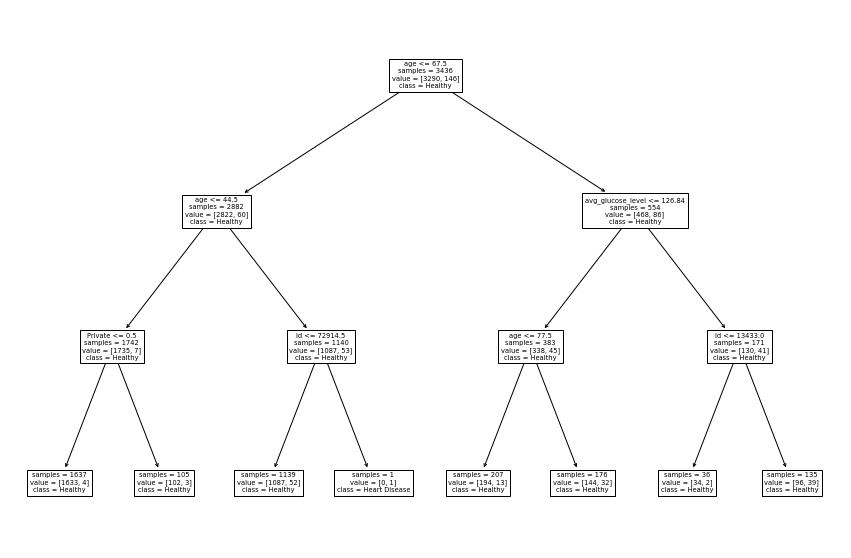

In [11]:
# Plot root of decision tree
d_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=50)
d_tree.fit(train_data, train_labels)

figure(figsize=(15, 10))
tree.plot_tree(d_tree, feature_names=data.columns.values,
               class_names=['Healthy', 'Heart Disease'], impurity=False);